
{'pstring': '014/14/2/3', 'transimpedance': 727.2621911621392, 'Vpp': 0.004927079615255271, 'Ref_Vpp': 0.0, 'output_impedance': 291.38209297866723, 'current_bias': 0.8785819282317335}


'pstring' Pathstrings: '014/14/1/1' record name
 
'transimpedance': 738.6014767733689, slope (= dV/dI) 

'Vpp': 0.004890991306172068 high of function(max to zero)




for sin like function:
    $$\frac{slop1}{slop2} = \frac{A1}{A2} $$

we want to compare the slope in the same amplitude
let's say we want the slope for 0.01Vpp 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import os
import glob
#import packages

def getDict(file):
    """This function reads a pickle file 
    and returns the dictionary stored in it"""

    with open(file,'rb') as f:
        SQUID_dict = pkl.load(f)
        #print(type(SQUID_dict.keys()))
    return SQUID_dict

def getPString(dict):
    """This function returns the pathstring from the dictionary"""
    pstring = dict['pstring']
    return pstring

def getUnifiedTrans(dict, u_Vpp = 0.005):
    """This function returns the unified transimpedance from the dictionary"""
    unified_Vpp = u_Vpp
    Trans = dict['transimpedance']
    Vpp = dict['Vpp']
    unified_Trans = unified_Vpp/Vpp*Trans
    return unified_Trans


In [2]:
#get all data file from the directory

# Specify the directory path
folder_path = './'

# Use glob to list all .pkl files in the directory
pkl_files = glob.glob(os.path.join(folder_path, '*.pkl'))

# Filter files that are larger than 10KB (10 * 1024 bytes)
files_above_10kb = [file for file in pkl_files if os.path.getsize(file) > (10 * 1024)]
#print(files_above_10kb)

In [3]:
#a empty dictionary to store diff pkl files
data = {}

#save the date to a Dictioanry
for i in range(len(files_above_10kb)):
    data[f'file_{i}'] = getDict(files_above_10kb[i])


#print(data)

print(data) output:

{'file_0':     
    {'SA13_070.1':           
        {'pstring': '017/2/1/1', 'transimpedance': 805.2293316493415, 'Vpp': 0.0051620676206559305, 'Ref_Vpp': 0.0, 'output_impedance': 787.4185861046597, 'current_bias': 0.8823173367920448
        },        
    'SA13_070.2':             
        {
        ...
        }
    ...    
    }
...
}

In [4]:
#find all same SQUID keys in all dictionaries

SQUID = [set(d.keys()) for d in data.values()]

same_SQUID = set.intersection(*SQUID)


In [5]:
#check same SQUIDs have same pstring
for SQUID in same_SQUID:
    pstrings = [getPString(d[SQUID]) for d in data.values()]
    if len(set(pstrings)) > 1:
        print(f'SQUID {SQUID} has different pstrings: {pstrings}')
    else:
        continue

In [6]:
#use functions to get unified transimpedance 

all_unifiedTrans = []

#group unified transimpedance by same SQUID
group_unifiedTrans = {} 


In [7]:

for j in same_SQUID:
    temp_group= [] #use a temp list to store the unified transimpedance for same SQUID
    for i in data.keys():
        unifiedTrans = getUnifiedTrans(data[i][j])
        temp_group.append(unifiedTrans)
        all_unifiedTrans.append(unifiedTrans)
    group_unifiedTrans[f"{j}"] = temp_group


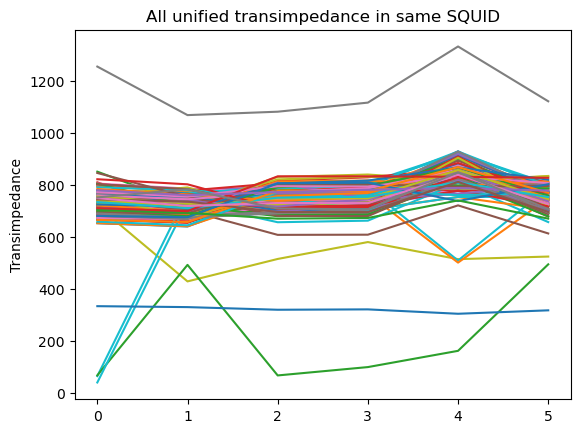

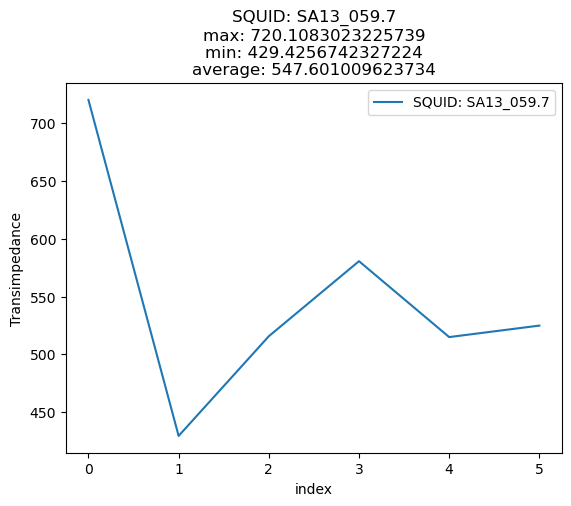

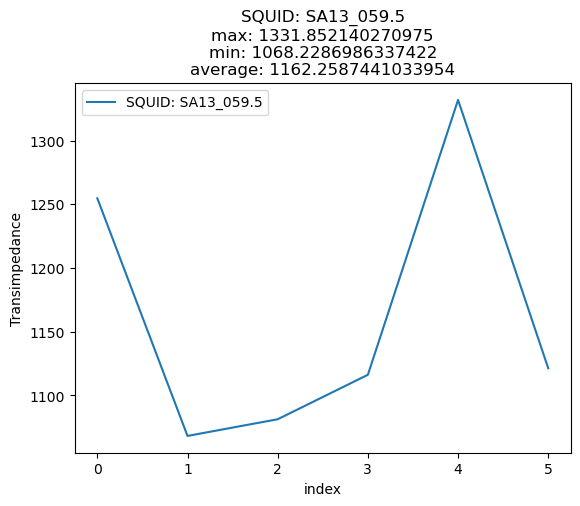

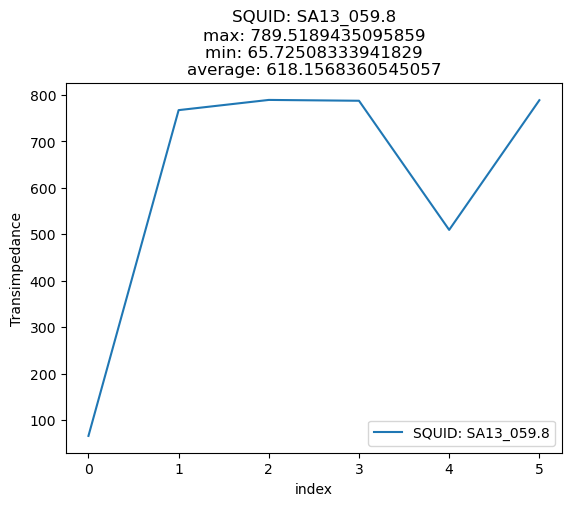

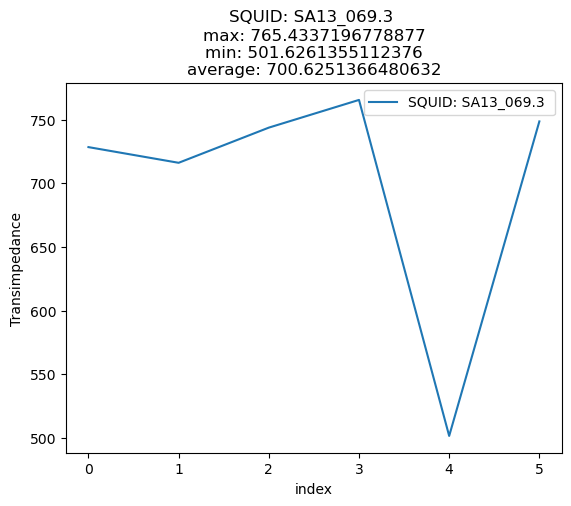

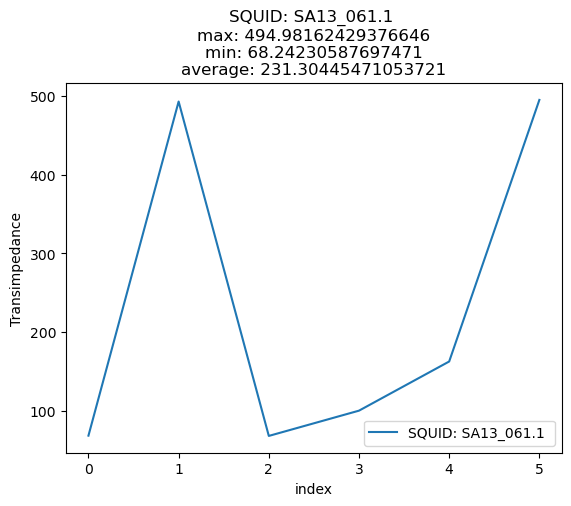

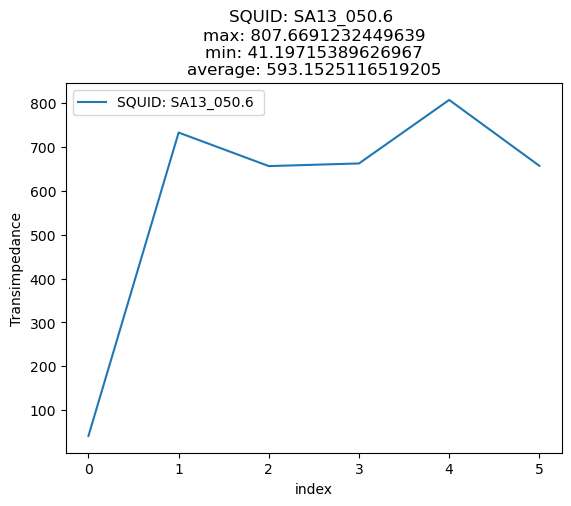

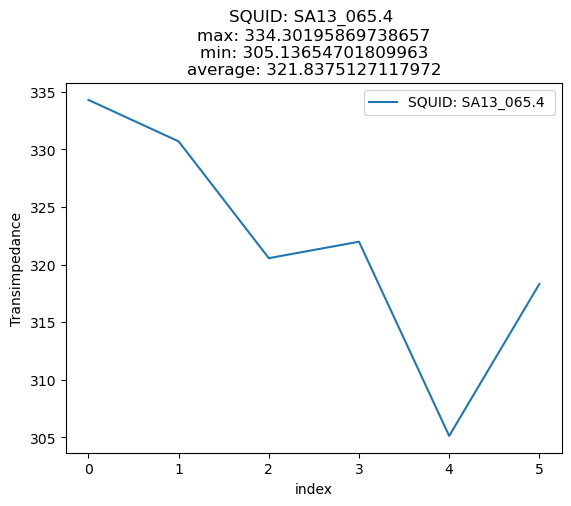

In [8]:
#plot the unified transimpedance in same SQUID
for SQUID in group_unifiedTrans.keys():
    plt.plot(group_unifiedTrans[SQUID])
    plt.title("All unified transimpedance in same SQUID")
    plt.ylabel("Transimpedance")
plt.show()
    
for SQUID in group_unifiedTrans.keys():
    max = np.max(group_unifiedTrans[SQUID])
    min = np.min(group_unifiedTrans[SQUID])
    average = np.average(group_unifiedTrans[SQUID])
    if not (max >= 1000 or min <= 600):
        continue
    label_name = f'SQUID: {SQUID}'
    plt.plot(group_unifiedTrans[SQUID], label = label_name)
    
    plt.legend()
    plt.title(f'SQUID: {SQUID}\nmax: {max}\nmin: {min}\naverage: {average}')
    plt.xlabel('index')
    plt.ylabel('Transimpedance')
    plt.show()
    #break

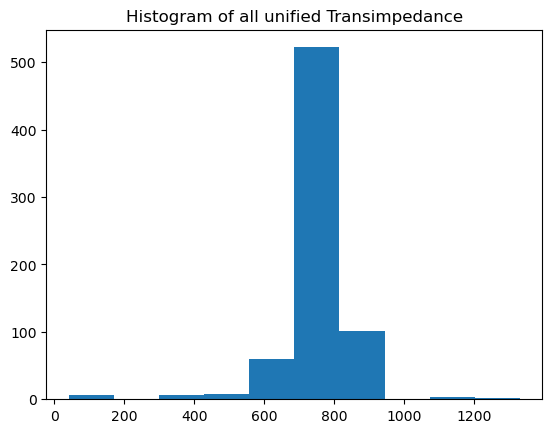

[  6.   0.   6.   8.  59. 522. 101.   1.   3.   2.]


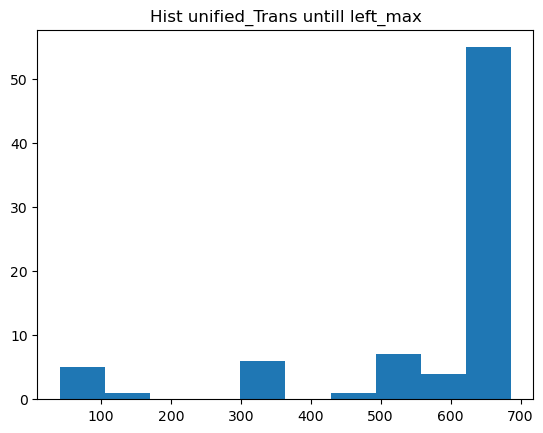

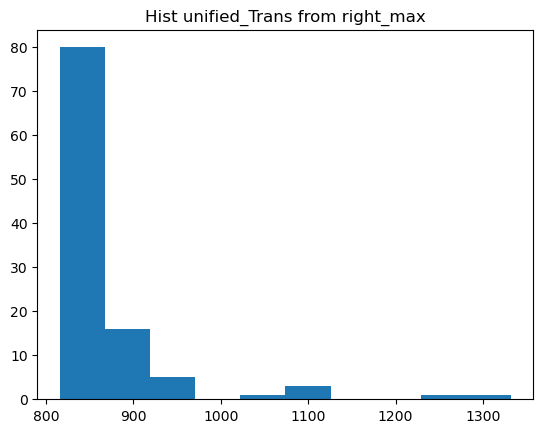

In [9]:
num, bins, patches = plt.hist(all_unifiedTrans, bins=10)
plt.title("Histogram of all unified Transimpedance")
plt.show()

print(num)

index_max = np.argmax(num)
left_max = bins[index_max]
right_max = bins[index_max + 1]

unifiedTrans_2_left_max = []
unifiedTrans_2_right_max = []

for i in all_unifiedTrans:
    if i < left_max:
        unifiedTrans_2_left_max.append(i)
    elif i > right_max:
        unifiedTrans_2_right_max.append(i)



plt.hist(unifiedTrans_2_left_max, bins=10)
plt.title("Hist unified_Trans untill left_max")
plt.show()

plt.hist(unifiedTrans_2_right_max, bins=10)
plt.title("Hist unified_Trans from right_max")
plt.show()